In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# load data and handle missing values

In [2]:
missing_val = '?'
df = pd.read_csv('.csv',na_values = missing_val)

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


top 5 rows of dataset

In [4]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


bottom 5 rows of the dtaset

In [5]:
df.shape

(48842, 15)

total rows of dataset - 48842



total columns in dataset - 15

In [6]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


brief information about dataset

In [8]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

finding all missing values

In [9]:
df.dropna(inplace = True)

row are removed which are having missing values 

In [10]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [11]:
df.drop('fnlwgt',axis=1,inplace=True)
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


removing fnlwgt column from the dataset

In [58]:
a = df.select_dtypes(include=['object'])

In [65]:
a

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [67]:
code = OneHotEncoder(drop='first', sparse=False)
A_df = pd.DataFrame(code.fit_transform(cat), 
                      columns=code.get_feature_names(cat.columns))

In [61]:
A_df

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45218,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
45219,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45220,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# standardization of data

In [69]:
B = df.select_dtypes(include=['int64'])

In [70]:
B

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
5,34,6,0,0,30
...,...,...,...,...,...
48837,27,12,0,0,38
48838,40,9,0,0,40
48839,58,9,0,0,40
48840,22,9,0,0,20


In [72]:
scaler = StandardScaler()
numeric_df = pd.DataFrame(scaler.fit_transform(num), 
                      columns = num.columns)

In [73]:
numeric_df.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120
4,-0.344079,-1.613277,-0.146733,-0.21878,-0.910942


In [74]:
new = pd.concat([num_df, cat_df], axis=1)

In [75]:
new

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.344079,-1.613277,-0.146733,-0.21878,-0.910942,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,-0.873671,0.737034,-0.146733,-0.21878,-0.244684,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45218,0.109857,-0.438122,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
45219,1.471665,-0.438122,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45220,-1.251951,-0.438122,-0.146733,-0.21878,-1.743763,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# training n testing data

In [76]:
Y = new.pop('income_>50K')
X = new

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.30,random_state=25)

In [80]:
LR = LogisticRegression( max_iter=250)
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=250,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# predicting

In [81]:
y_predict = LR.predict(X_test)
y_predict

array([1., 1., 0., ..., 0., 0., 0.])

In [26]:
# classification score.
accuracy_score(y_test, y_predict)

0.8497825606250461

In [79]:
# using confusion matrix
confusion_matrix(y_test, y_predict)

array([[9475,  685],
       [1353, 2054]], dtype=int64)

In [28]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     10160
         1.0       0.75      0.60      0.67      3407

    accuracy                           0.85     13567
   macro avg       0.81      0.77      0.79     13567
weighted avg       0.84      0.85      0.84     13567



In [84]:
from sklearn.feature_selection import RFE
L_temp = LogisticRegression( max_iter=250)
## No. of features taken
rf = RFE(L_temp, 30)
rf = rf.fit(X_train, y_train)
rf

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=250,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=30, step=1, verbose=0)

In [85]:
temp = pd.DataFrame({'Columns' : X_train.columns, 'Included' : rfe.support_, 'Ranking' : rfe.ranking_})
temp

,Columns,Included,Ranking
0,age,False,11
1,educational-num,True,1
2,capital-gain,True,1
3,capital-loss,False,38
4,hours-per-week,False,12
...,...,...,...
90,native-country_Thailand,False,36
91,native-country_Trinadad&Tobago,False,49
92,native-country_United-States,False,32
93,native-country_Vietnam,True,1


In [86]:
column = X_train.columns[rfe.support_]
column

Index(['educational-num', 'capital-gain', 'workclass_Without-pay',
       'education_1st-4th', 'education_5th-6th', 'education_Prof-school',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Wife', 'gender_Male',
       'native-country_Columbia', 'native-country_Dominican-Republic',
       'native-country_Ecuador', 'native-country_El-Salvador',
       'native-country_India', 'native-country_Laos', 'native-country_Mexico',
       'native-country_Nicaragua', 'native-country_Outlying-US(Guam-USVI-etc)',
       'native-country_Peru', 'native-country_Scotland',
       'native-country_South', 'native-country_Vietnam'],
      dtype='object')

In [88]:
new_train = X_train[column]
new_train

,educational-num,capital-gain,workclass_Without-pay,education_1st-4th,education_5th-6th,education_Prof-school,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,occupation_Exec-managerial,occupation_Farming-fishing,...,native-country_El-Salvador,native-country_India,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Scotland,native-country_South,native-country_Vietnam
21220,-1.613277,-0.146733,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8492,1.128753,-0.146733,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22673,-0.046403,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
755,1.128753,0.166868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34307,-0.438122,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35702,-0.046403,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26767,-0.046403,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6618,1.912190,-0.146733,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24894,1.128753,-0.146733,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
learn = LogisticRegression(max_iter=250)
learn.fit(X_train_new, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=250,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
y_new = learn.predict(X_train_new)
y_new

array([0., 1., 0., ..., 0., 1., 0.])

In [91]:
accuracy_score(y_test, y_predict)

0.8497825606250461

In [93]:
P = PCA(whiten=True)
P.fit(X)
np.cumsum(P.explained_variance_ratio_)

array([0.17231214, 0.29928058, 0.41859915, 0.52288518, 0.62121152,
       0.66781356, 0.69754836, 0.72354624, 0.74943991, 0.77017519,
       0.78875128, 0.80669662, 0.8222957 , 0.83642948, 0.84981652,
       0.8613533 , 0.87204272, 0.88250789, 0.89196213, 0.90045472,
       0.9079432 , 0.91518055, 0.92166351, 0.9276611 , 0.93310102,
       0.93814771, 0.94258311, 0.94674013, 0.95079417, 0.95475762,
       0.95861136, 0.96208182, 0.96547486, 0.96881006, 0.9718258 ,
       0.97417841, 0.97648633, 0.97868178, 0.98059593, 0.98226676,
       0.98385806, 0.98536841, 0.98661583, 0.98783116, 0.98894152,
       0.98994237, 0.99067315, 0.99131579, 0.99191365, 0.9924472 ,
       0.99292544, 0.99335723, 0.99375246, 0.99410984, 0.99446161,
       0.99478634, 0.99509617, 0.99538628, 0.99566147, 0.99591763,
       0.99617243, 0.9964134 , 0.99664952, 0.99688091, 0.99710149,
       0.99731476, 0.99752243, 0.99770572, 0.99788872, 0.99805956,
       0.99822186, 0.99837038, 0.99851495, 0.9986505 , 0.99877

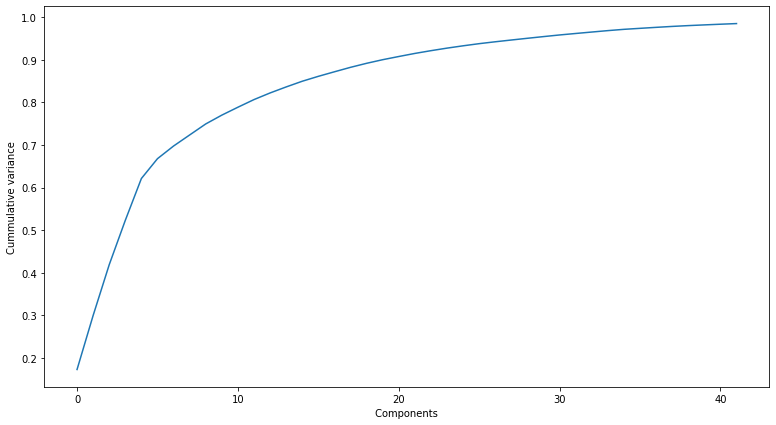

In [97]:
plt.figure(figsize = (13, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel(' Components ')
plt.ylabel('Cummulative variance')
plt.show()

In [99]:
D = PCA(n_components=42,whiten=True)
X_PCA = D.fit_transform(X)

In [100]:
X_PCA

array([[-1.32184844,  0.0805435 ,  0.13034847, ...,  0.07606998,
        -0.23544794, -0.21421012],
       [ 0.14191915, -0.60993306,  0.17576669, ..., -0.51465585,
        -0.23782057,  0.21360904],
       [ 0.13880642,  0.74367826, -0.06938524, ...,  0.26620756,
         0.01870746, -0.25670479],
       ...,
       [ 0.14446594, -1.32453457,  0.31385217, ...,  0.18636351,
        -0.00497601,  0.06496701],
       [-1.74087891,  0.6839305 ,  0.02648179, ...,  0.01646566,
        -0.12231342, -0.15986133],
       [ 0.85528542, -0.72330209,  1.41193187, ...,  0.10512398,
         0.32585   , -0.07381771]])

In [101]:
x_train, x_test, y_train, y_test = train_test_split(X_PCA[:], Y, test_size=.30, random_state=25)

In [102]:
log = LogisticRegression(max_iter = 250)

log.fit(x_train,y_train)

#predicting

y_predict_logistic = logist.predict(x_test)

In [42]:
print('Accuracy score : {}'.format(accuracy_score(y_test,y_predict_logistic)))

print('\n')

print('Confusion matrix :')

print(confusion_matrix(y_test,y_predict_logistic))

print('\n')

print('Classification Report :')

print(classification_report(y_test,y_predict_logistic))

Accuracy score : 0.8502985184639198


Confusion matrix :
[[9497  663]
 [1368 2039]]


Classification Report :
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     10160
         1.0       0.75      0.60      0.67      3407

    accuracy                           0.85     13567
   macro avg       0.81      0.77      0.79     13567
weighted avg       0.84      0.85      0.84     13567



In [104]:
svm = svm.SVC()

svm.fit(x_train,y_train)

#Predicting test data

y_predict_svm = svm.predict(x_test)

In [105]:
print('Accuracy score : {}'.format(accuracy_score(y_test,y_predict_svm)))

print('\n')

print('Confusion matrix :')

print(confusion_matrix(y_test,y_predict_svm))

print('\n')

print('Classification Report :')

print(classification_report(y_test,y_predict_svm))

Accuracy score : 0.8501511019385273


Confusion matrix :
[[9522  638]
 [1395 2012]]


Classification Report :
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     10160
         1.0       0.76      0.59      0.66      3407

    accuracy                           0.85     13567
   macro avg       0.82      0.76      0.78     13567
weighted avg       0.84      0.85      0.84     13567



In [106]:
knc = KNeighborsClassifier(n_neighbors=3)

knc.fit(x_train,y_train)

#Predicting test data

y_predict_knn = knc.predict(x_test)

In [107]:
print('Accuracy score : {}'.format(accuracy_score(y_test,y_predict_knn)))

print('\n')

print('Confusion matrix :')

print(confusion_matrix(y_test,y_predict_knn))

print('\n')

print('Classification Report :')

print(classification_report(y_test,y_predict_knn))

Accuracy score : 0.8169823837252156


Confusion matrix :
[[9102 1058]
 [1425 1982]]


Classification Report :
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88     10160
         1.0       0.65      0.58      0.61      3407

    accuracy                           0.82     13567
   macro avg       0.76      0.74      0.75     13567
weighted avg       0.81      0.82      0.81     13567



In [108]:
dc = DecisionTreeClassifier()
dc.fit(x_train,y_train)
##Predicting the test data
y_predict_dc = dc.predict(x_test)

In [112]:
print('Accuracy score : {}'.format(accuracy_score(y_test,y_predict_dc)))

print('\n')

print('Confusion matrix :')

print(confusion_matrix(y_test,y_predict_dc))

print('\n')

print('Classification Report :')

print(classification_report(y_test,y_predict_dc))

Accuracy score : 0.8015773568216997


Confusion matrix :
[[8892 1268]
 [1424 1983]]


Classification Report :
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87     10160
         1.0       0.61      0.58      0.60      3407

    accuracy                           0.80     13567
   macro avg       0.74      0.73      0.73     13567
weighted avg       0.80      0.80      0.80     13567



In [110]:
from sklearn.ensemble import RandomForestClassifier

rc = RandomForestClassifier()

rc.fit(x_train,y_train)
# Predicting test data
y_predict_rc = rc.predict(x_test)

In [113]:
print('Accuracy score : {}'.format(accuracy_score(y_test,y_predict_rc)))
print('\n')
print('Confusion matrix :')
print(confusion_matrix(y_test,y_predict_rc))
print('\n')
print('Classification Report :')
print(classification_report(y_test,y_predict_rc))

Accuracy score : 0.8391685707967863


Confusion matrix :
[[9318  842]
 [1340 2067]]


Classification Report :
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.90     10160
         1.0       0.71      0.61      0.65      3407

    accuracy                           0.84     13567
   macro avg       0.79      0.76      0.77     13567
weighted avg       0.83      0.84      0.83     13567



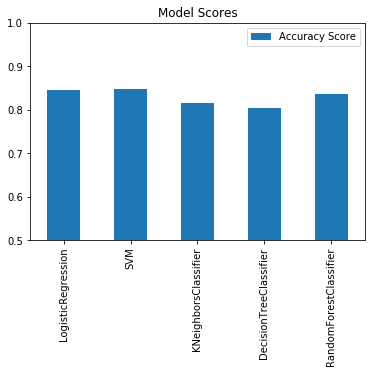

,Accuracy Score
LogisticRegression,0.846513
SVM,0.847950
KNeighborsClassifier,0.815112
DecisionTreeClassifier,0.803547
RandomForestClassifier,0.837491


In [51]:
from sklearn import svm
def lets_try(train,labels):
    results={}
    
    def test_model(model):
        cv = KFold(n_splits=5,shuffle=True,random_state=15)
        predicted = cross_val_score(model, train, Y, cv=cv)
        scores=[predicted.mean()]
        return scores
    
    model = LogisticRegression()
    results["LogisticRegression"]=test_model(model)
    
    model = svm.SVC()
    results["SVM"]=test_model(model)
    
    model = KNeighborsClassifier(n_neighbors=3)
    results['KNeighborsClassifier']=test_model(model)
    
    model = DecisionTreeClassifier()
    results["DecisionTreeClassifier"]=test_model(model)
    
    model = RandomForestClassifier()
    results["RandomForestClassifier"]=test_model(model)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["Accuracy Score"]
    
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0.5,1])
    plt.show()
    
    return results

lets_try(X_PCA[:],Y)